# **Predicting Rankings of Tennis Players: The 2018 ATP Tour**

<br>

# **Introduction**

The Association of Tennis Professionals (ATP) runs an annual international tour in which the world’s elite male tennis players are able to test their skill and grit against various opponents from different nations. Tournaments are held in a variety of countries, and winning a match in these tournaments awards the victors points. Each week, the ATP updates the rankings of these players, adding the number of points gained within the 7-day period to the total points the player has garnered over the season. 
<br><br>
As a result of the number of tournaments held over the ATP season, the shift of rankings is fairly common. The goal of this data analysis is to predict the rankings of these professional tennis players based on a number of variables. The focus of the following data analysis is on the 2018 ATP World Tour, a series of tennis tournaments held between the period of January 2018 to November 2018. This particular period of time was chosen to avoid the effects of the COVID-19 pandemic, such as the cancellation of tournaments, and to make sure the data is stagnant, with no new data being added. The data includes the names of winners and losers from every round of national and international tennis tournaments. Multiple statistics are included in this data, which aids us in the prediction of our question: how well do variables relating to player status, such as win percentage, first-serve wins, and age predict the ATP ranking of the tennis player in later seasons? 
<br><br>
To analyze this, we will be looking at a dataset that includes the following columns:
* `tourney_id`: a unique identifier for each tournament
* `tourney_name`: a tourney name for each tournament
* `surface`
* `draw_size`: number of players in the draw, often rounded up to the nearest power of 2
* `tourney_level`: the level of the tournament; 
   - For men: 'G' = Grand Slams, 'M' = Masters 1000s, 'A' = other tour-level events, 'C' = Challengers, 'S' = Satellites/ITFs, 'F' = Tour finals and other season-ending events, and 'D' = Davis Cup 
   - For women, there are several additional tourney_level codes, including 'P' = Premier, 'PM' = Premier Mandatory, and 'I' = International. The various levels of ITFs are given by the prize money (in thousands). Other codes, such as 'T1' for Tier I (and so on) are used for older WTA tournament designations. 'D' is used for Federation/Fed/Billie Jean King Cup, and also for Wightman Cup and Bonne Bell Cup

* `tourney_date`: tournament dates, eight digits, YYYYMMDD
* `match_num`: a match-specific identifier
* `winner_id`: the player_id used in the github repo for the winner of the match
* `winner_seed`
* `winner_entry`: 'WC' = wild card, 'Q' = qualifier, 'LL' = lucky loser, 'PR' = protected ranking, 'ITF' = ITF entry
* `winner_name`: the name of the winner
* `winner_hand`: winner's hand preference; R = right, L = left, U = unknown.
* `winner_ht`: height of the winner in centimeters (cm), where available
* `winner_ioc`: winner's three-character country code
* `winner_age`: winner's age, in years, as of the tourney_date

* `loser_id`: the player_id used in the github repo for the loser of the match
* `loser_seed`
* `loser_entry`: 'WC' = wild card, 'Q' = qualifier, 'LL' = lucky loser, 'PR' = protected ranking, 'ITF' = ITF entry
* `loser_name`: the name of the loser
* `loser_hand`: loser's hand preference; R = right, L = left, U = unknown.
* `loser_ht`: height of the loser in centimeters (cm), where available
* `loser_ioc`: loser's three-character country code
* `loser_age`: loser's age, in years, as of the tourney_date
* `score`
* `best_of`: '3' or '5', indicating the the number of sets for this match
* `round`
* `minutes`: match length, where available
* `w_ace`: winner's number of aces
* `w_df`: winner's number of doubles faults
* `w_svpt`: winner's number of serve points
* `w_1stIn`: winner's number of first serves made
* `w_1stWon`: winner's number of first-serve points won
* `w_2ndWon`: winner's number of second-serve points won
* `w_SvGms`: winner's number of serve games
* `w_bpSaved`: winner's number of break points saved
* `w_bpFaced`: winner's number of break points faced
* `l_ace`    : loser's number of aces
* `l_df`     : loser's number of doubles faults
* `l_svpt`   : loser's number of serve points
* `l_1stIn`  : loser's number of first serves made
* `l_1stWon` : loser's number of first-serve points won
* `l_2ndWon` : loser's number of second-serve points won
* `l_SvGms`  : loser's number of serve games
* `l_bpSaved`: loser's number of break points saved
* `l_bpFaced`: loser's number of break points faced
* `winner_rank`: winner's ATP or WTA rank, as of the tourney_date, or the most recent ranking date before the tourney_date
* `winner_rank_points`: number of winner's ranking points, where available
* `loser_rank`: loser's ATP or WTA rank, as of the tourney_date, or the most recent ranking date before the tourney_date
* `loser_rank_points`: number of loser's ranking points, where available

<br>

# **Methods & Results**

During our preliminary data analysis, we first tidied and scaled the data and then narrowed it down to variables that would be relevant to our analysis. All the variables used during the data analysis were averaged, the statistics of each player would be collected after each match they played during the season. As a result, each player’s ranking, service points, aces, and other predictor variables can be similar compared to each other, and the data could be adequately tidied, so multiple cells of the same statistic are not paired up to a single player’s name. Furthermore, the original data includes the statistics from the top 500 players in the ATP Tour. However, many of the players lacked important data that was needed for the prediction to be made, thus they were filtered out. Additionally, we filtered for the Top 100 players in terms of ranking of the tour to be included in our predictors. This is due to the fact that beyond the Top 100 players, most other players had very few games played. This resulted in heavy outliers for the predictor, which would cause the accuracy of our model to greatly decrease. For example, many players with only one or two games played would have a win percentage of 50% or higher, despite not having a strong serving ability or break points faced. 

During the process of tidying the data, we filtered out the tennis dataset to only contain tennis matches on 2018. We also tidied any loser data, as the loser of the match and their performance does not affect their score and therefore their rankings. Points that affect rankings are only gained when a game is won, no points are deducted if a game is lost. Instead, we later went on to reflect on their losses by creating a variable for win percentage. By mutating and dividing the total number of games won by the number of games played to create the win_percent column, this observation allowed us to take into account the player who may have been unable to play a multitude of games. It also provided an additional variable that would likely help in predicting the winner ranking, as it is assumed that more skillful players with higher rankings would have a higher win percentage. 


Thereafter, we grouped each statistic to each player and summarized the mean statistics for each player, further narrowed down to 11 predictor variables — neglecting match specifics as they do not have any relationship to the player’s ranking. We then utilized `ggpairs` to visualize the univariate and bivariate analysis, as well as interpret the correlation values. By looking at the plot, it was determined that the data was fairly non-linear, and it is inadequate for simple linear regression. Therefore, we chose KNN-Regression to predict our rankings. The data was split into a 75% testing and a 25% training set. This decision to split the data into these proportions was to ensure that there was enough data for the testing set, without sacrificing the accuracy of the model with a large enough training set. The 11 predictor variables were then used to produce a recipe. To make a KNN-Regression model, the K-value that optimized the accuracy must be determined. To do this, we tuned our model and ran a cross-validation of 5 folds to determine the  cross-validaccuracy. In theation, we used a `grid` value with a sequence of 1 to 40, as by testing more values, our accuracy would have continued to decrease. Our k-nearest neighbors model and cross-validation showed that the model was most accurate with 8 neighbors. Finally, with the number of neighbors at 8, the model evaluated the testing data, resulting with an RMSPE of 21.81939.

<br>

# **Exploratory Data Analysis**

### **Downloading and Importing Libraries**

In [1]:
# Download Libraries
# install.packages("tidyverse")
# install.packages("tidymodels")
# install.packages("repr")
# install.packages("gridExtra")
# install.packages("ggplot2")
# install.packages("GGally")
# install.packages("digest")

# Importing Libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(gridExtra)
library(ggplot2)
library(GGally)
library(digest)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### **Setting Seed**

This project uses functions from the tidymodels library, which rely heavily on randomness. We use randomness whenever we need a fair and unbiased decision-making algorithm in our analysis. We need to establish a seed, which specifies the sequence of random integers, R will create in order to ensure that the stages in the worksheet are repeatable. In other words, utilizing this parameter guarantees that anyone running the code over and over again would obtain the same results. In data science and other domains, reproducibility is very crucial.

In [2]:
set.seed(1)

### **Download the Tennis Dataset**

In [3]:
url <- "https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn"
download.file(url, "data/data.csv")

### **Load the Tennis Dataset**

In [4]:
tennis <- read_csv("data/data.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



### **Reading and Understanding Data**

In [5]:
# Previewing top 5 data of the dataset
cat("Table 1: Top 6 Data of Tennis Dataset")
head(tennis)
cat("(Source: https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn)")

Table 1: Top 6 Data of Tennis Dataset

X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275


(Source: https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn)

In [6]:
# Inspecting the dataframe
glimpse(tennis)

Rows: 6,866
Columns: 50
$ X1                 <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ tourney_id         <chr> "2019-M020", "2019-M020", "2019-M020", "2019-M020"…
$ tourney_name       <chr> "Brisbane", "Brisbane", "Brisbane", "Brisbane", "B…
$ surface            <chr> "Hard", "Hard", "Hard", "Hard", "Hard", "Hard", "H…
$ draw_size          <dbl> 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32…
$ tourney_level      <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", …
$ tourney_date       <dbl> 20181231, 20181231, 20181231, 20181231, 20181231, …
$ match_num          <dbl> 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, …
$ winner_id          <dbl> 105453, 106421, 105453, 104542, 106421, 104871, 10…
$ winner_seed        <chr> "2", "4", "2", NA, "4", NA, "2", NA, "7", "4", "5"…
$ winner_entry       <chr> NA, NA, NA, "PR", NA, NA, NA, "PR", NA, NA, NA, NA…
$ winner_name        <chr> "Kei Nishikori", "Daniil Medvedev", "Kei Nishikori…
$ winner_hand        <chr> "

In [7]:
# Shape of the dataset
dim(tennis)

[1] 6866   50

In [8]:
# Examine the dataset
summary(tennis)

       X1          tourney_id        tourney_name         surface         
 Min.   :   0.0   Length:6866        Length:6866        Length:6866       
 1st Qu.: 775.2   Class :character   Class :character   Class :character  
 Median :1485.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1466.4                                                           
 3rd Qu.:2169.8                                                           
 Max.   :2888.0                                                           
                                                                          
   draw_size      tourney_level       tourney_date        match_num     
 Min.   :  4.00   Length:6866        Min.   :20170102   Min.   :   1.0  
 1st Qu.: 32.00   Class :character   1st Qu.:20171002   1st Qu.: 243.0  
 Median : 32.00   Mode  :character   Median :20180716   Median : 278.0  
 Mean   : 60.72                      Mean   :20181355   Mean   : 264.6  
 3rd Qu.:128.00                    

In [9]:
# Column names of the dataset
colnames(tennis)

[1] "X1"                 "tourney_id"         "tourney_name"      
 [4] "surface"            "draw_size"          "tourney_level"     
 [7] "tourney_date"       "match_num"          "winner_id"         
[10] "winner_seed"        "winner_entry"       "winner_name"       
[13] "winner_hand"        "winner_ht"          "winner_ioc"        
[16] "winner_age"         "loser_id"           "loser_seed"        
[19] "loser_entry"        "loser_name"         "loser_hand"        
[22] "loser_ht"           "loser_ioc"          "loser_age"         
[25] "score"              "best_of"            "round"             
[28] "minutes"            "w_ace"              "w_df"              
[31] "w_svpt"             "w_1stIn"            "w_1stWon"          
[34] "w_2ndWon"           "w_SvGms"            "w_bpSaved"         
[37] "w_bpFaced"          "l_ace"              "l_df"              
[40] "l_svpt"             "l_1stIn"            "l_1stWon"          
[43] "l_2ndWon"           "l_SvGms"            "l_bpSaved"         
[46] "l_bpFaced"          "winner_rank"        "winner_rank_points"
[49] "loser_rank"         "loser_rank_points"

### **Filtering the Dataset**

Here, we want to filter the initial tennis dataset to include only the games held in 2018.

In [10]:
tennis <- filter(tennis, substr(tourney_date, 0, 4) == "2018")

cat("Table 2: Tennis Dataset 2018")
tennis

Table 2: Tennis Dataset 2018

X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2886,2018-M-DC-2018-WG-M-FRA-CRO-01,Davis Cup WG F: FRA vs CRO,Clay,4,D,20181123,1,106432,NA,⋯,64,43,18,15,9,13,12,2480,40,1050
2887,2018-M-DC-2018-WG-M-FRA-CRO-01,Davis Cup WG F: FRA vs CRO,Clay,4,D,20181123,2,105227,NA,⋯,57,39,18,15,1,4,7,4250,259,200
2888,2018-M-DC-2018-WG-M-FRA-CRO-01,Davis Cup WG F: FRA vs CRO,Clay,4,D,20181123,4,105227,NA,⋯,58,43,21,15,9,12,7,4250,32,1245


#### **Add Win Percentage Column**

Here, we create another predictor column named `win_percent` which is the win percentage of each player in the tournaments. Win Percentage is the total number of wins divided by the total number of games they've played. Therefore this predictor variable is not affected by the number of games they've played. 

In [36]:
# Group by winner's name
player_stats_win <- group_by(tennis, winner_name) %>% 
    summarize(winner_rank = mean(winner_rank), 
              n_winner = n(), 
              w_ace = mean(w_ace), w_df = mean(w_df), 
              w_svpt = mean(w_svpt), w_1stIn = mean(w_1stIn), w_1stWon = mean(w_1stWon), 
              w_2ndWon = mean(w_2ndWon), w_SvGms = mean(w_SvGms), w_bpSaved = mean(w_bpSaved), 
              w_bpFaced = mean(w_bpFaced)) %>% 
    na.omit() %>% 
    arrange(winner_rank) %>% 
    rename(name = winner_name)

# Group by loser's name
player_stats_lose <- group_by(tennis, loser_name) %>% 
    summarize(loser_rank = mean(loser_rank), n_lose = n()) %>% 
    na.omit() %>% 
    arrange(loser_rank) %>%
    rename(name = loser_name)

# Merge both loser and winner table
player_stats <- merge(player_stats_win, player_stats_lose, by = "name") %>% 
    arrange(winner_rank) %>% 
    head(100)

# Add Win Percentage column
player_stats <- player_stats %>% 
    mutate(total_played = n_winner + n_lose, 
           win_percent = n_winner / (n_winner + n_lose)) %>% 
    arrange(desc(win_percent)) %>% 
    subset(select = -c(n_winner, n_lose, loser_rank, name))
 
cat("Table 3: Tidied data of the tennis dataset grouped by player name")
player_stats

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



Table 3: Tidied data of the tennis dataset grouped by player name

,winner_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,total_played,win_percent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1.119048,2.357143,2.119048,77.16667,49.90476,36.23810,16.78571,12.85714,3.642857,5.166667,46,0.9130435
2,10.888889,5.185185,2.277778,76.12963,50.37037,38.12963,15.00000,12.74074,2.666667,3.944444,67,0.8059701
3,3.905660,8.075472,2.528302,73.67925,48.00000,36.98113,14.26415,12.43396,2.830189,4.188679,72,0.7361111
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
98,86.5,0.5,3,52,39.5,28.5,4.5,8.5,2.5,4,11,0.1818182
99,127.0,11.0,6,114,72.0,49.0,22.0,16.0,3.0,5,6,0.1666667
100,118.0,6.0,0,49,41.0,30.0,7.0,9.0,0.0,0,7,0.1428571


### **Splitting the Data into Training and Testing Set**

In [12]:
player_split <- initial_split(player_stats, prop = 3/4, strata = winner_rank)
player_training <- training(player_split)
player_testing <- testing(player_split)

cat("Table 4: Training Dataset of Tennis Dataset 2018")
player_testing

cat("\n\n\nTable 5: Testing Dataset of Tennis Dataset 2018")
player_training

Table 4: Training Dataset of Tennis Dataset 2018

,winner_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,total_played,win_percent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1.119048,2.357143,2.119048,77.16667,49.90476,36.23810,16.78571,12.85714,3.642857,5.166667,46,0.9130435
2,10.888889,5.185185,2.277778,76.12963,50.37037,38.12963,15.00000,12.74074,2.666667,3.944444,67,0.8059701
4,7.913043,18.108696,2.826087,90.34783,59.00000,48.26087,18.10870,15.23913,2.500000,3.500000,65,0.7076923
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
94,116,1.333333,2,51.66667,34,27,9.666667,9,3.333333,4,13,0.2307692
99,127,11.000000,6,114.00000,72,49,22.000000,16,3.000000,5,6,0.1666667
100,118,6.000000,0,49.00000,41,30,7.000000,9,0.000000,0,7,0.1428571





Table 5: Testing Dataset of Tennis Dataset 2018

,winner_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,total_played,win_percent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
3,3.90566,8.075472,2.528302,73.67925,48.00000,36.98113,14.26415,12.43396,2.830189,4.188679,72,0.7361111
5,7.16000,7.240000,3.300000,78.80000,46.56000,36.28000,18.04000,12.98000,2.640000,3.920000,72,0.6944444
6,19.67442,4.255814,2.209302,76.86047,46.25581,34.76744,17.95349,12.60465,3.023256,4.488372,63,0.6825397
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
96,98.0,6.0,3,82,52.0,37.0,16.0,14.0,2.0,4.0,5,0.2000000
97,114.0,4.0,4,82,44.0,31.5,17.5,13.0,3.5,6.5,10,0.2000000
98,86.5,0.5,3,52,39.5,28.5,4.5,8.5,2.5,4.0,11,0.1818182


### **Pair Plot**

In [13]:
options(repr.plot.width = 12, repr.plot.height = 12)

Figure 1: Pair plot of the tidied tennis dataset

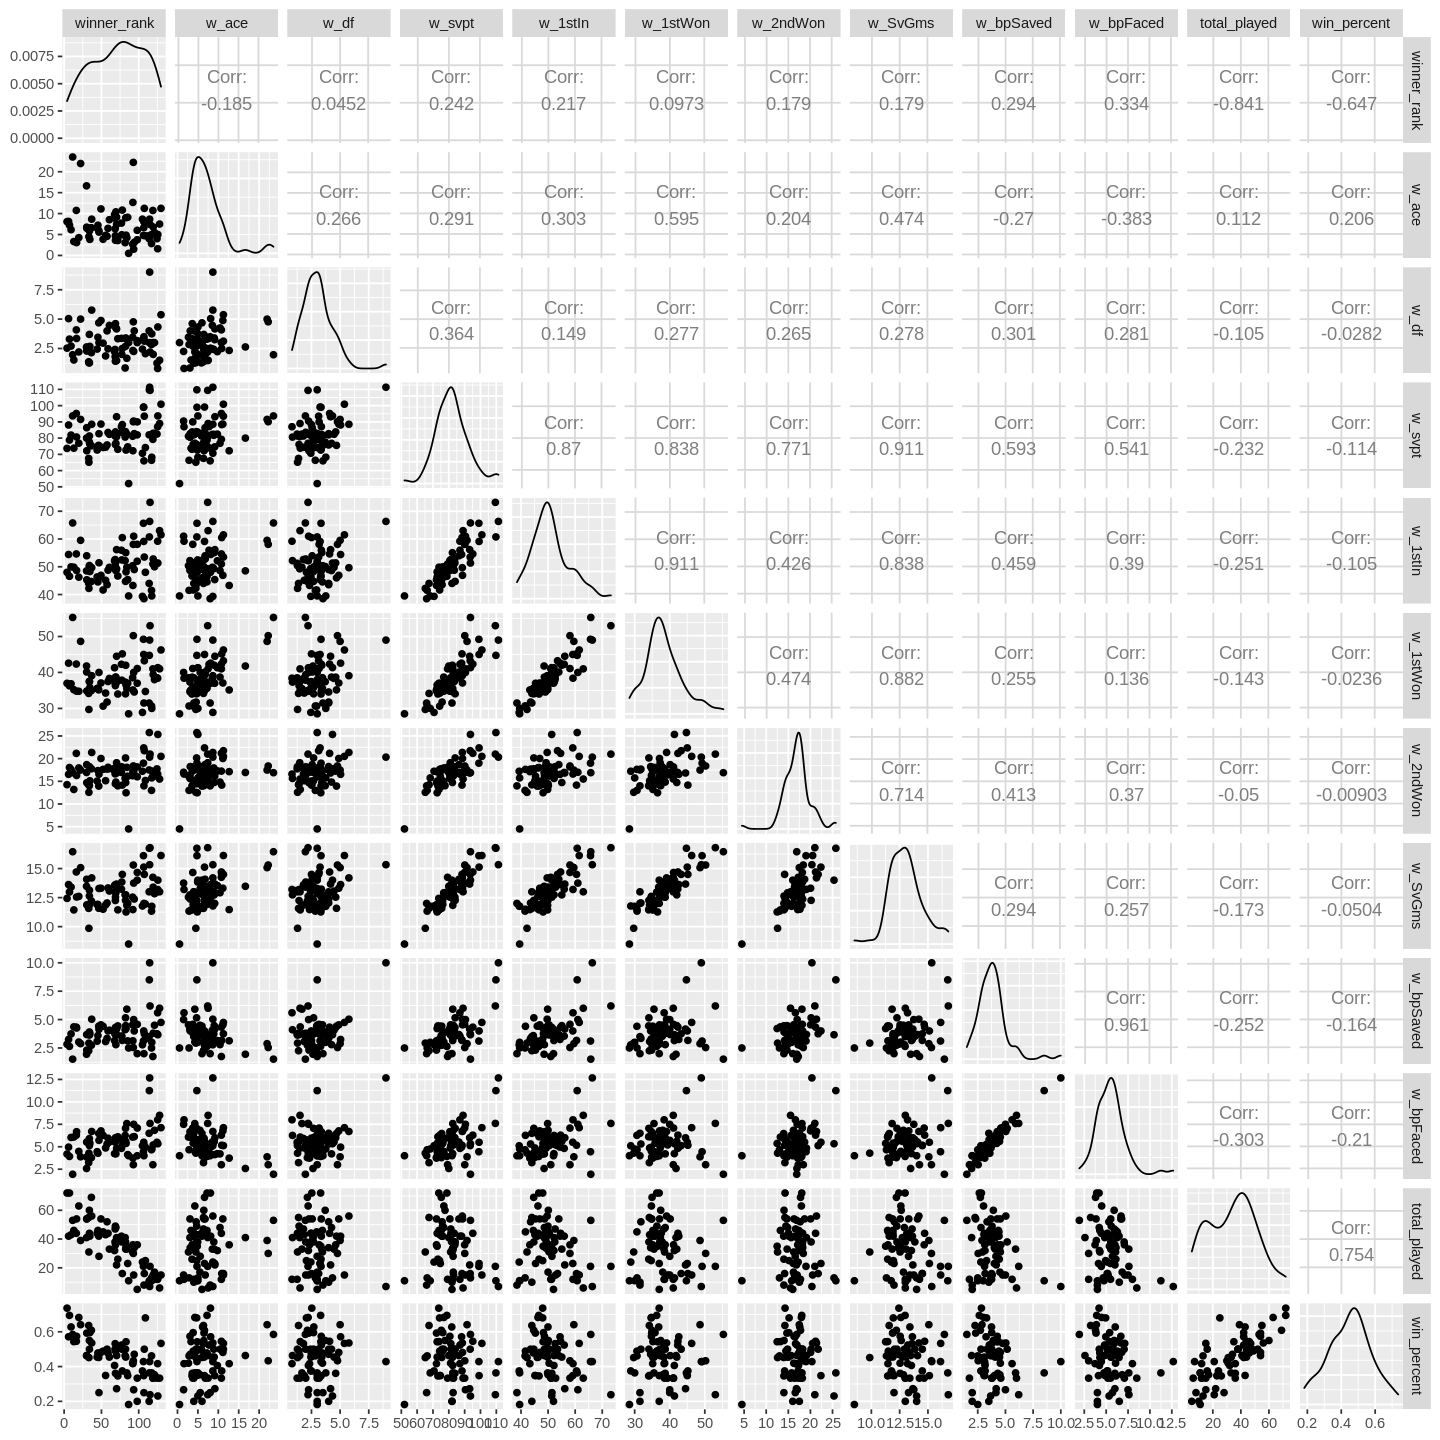

In [14]:
pair_plot <- player_training %>% ggpairs()

pair_plot
cat("Figure 1: Pair plot of the tidied tennis dataset")

Using only the observations in the training data set, we create a `ggpairs` scatterplot of all the columns we are interested in including in our model. There is a strong negative relationship between the response variable `winner_rank` and the `total_played` and `win_percent` predictors. We can also see that there is no relationship between the response variable and the `w_1stWon` and `w_df` predictors. Rest of the predictors have a weak relationship with the response variable.

### **Bivariate Analysis**

We will now look at the scatterplots with each of the predictors more closely to analyze their relationship with the response variable.

In [15]:
options(repr.plot.width = 8, repr.plot.height = 6)

#### Winner's Rank vs Winner's Aces

 We can see there is a weak negative relationship between the response variable `winner_rank` and the `w_ace` predictor, based on the spread out points and fairly downhill pattern as you move from left to right.

Figure 2: Scatter plot of winner's rank versus winner's aces

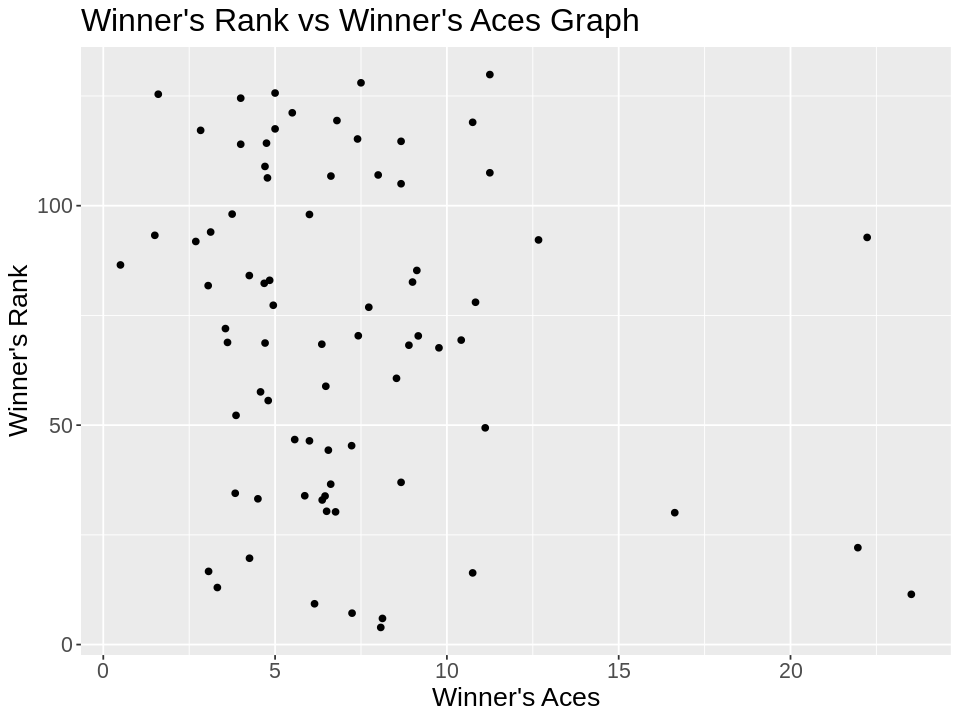

In [17]:
rank_vs_aces <- player_training %>% 
    ggplot(aes(x = w_ace, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Aces", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Aces Graph") +
        theme(text = element_text(size = 16))

rank_vs_aces
cat("Figure 2: Scatter plot of winner's rank versus winner's aces")

#### Winner's Rank vs Winner's Doubles Faults

We can see there is almost zero relationship between the response variable `winner_rank` and the `w_df` predictor, based on the spread out points.

Figure 3: Scatter plot of winner's rank versus winner's doubles faults

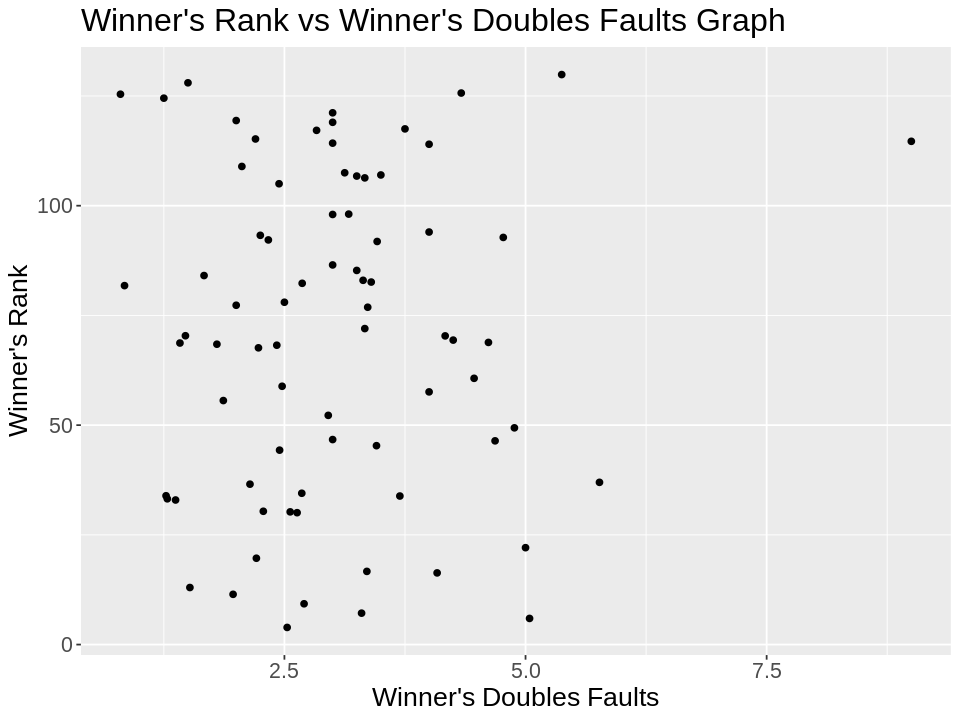

In [18]:
rank_vs_df <- player_training %>% 
    ggplot(aes(x = w_df, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Doubles Faults", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Doubles Faults Graph") +
        theme(text = element_text(size = 16))

rank_vs_df
cat("Figure 3: Scatter plot of winner's rank versus winner's doubles faults")

#### Winner's Rank vs Winner's Serve Points

 We can see there is a weak positive relationship between the response variable `winner_rank` and the `w_svpt` predictor, based on the spread out points and fairly uphill pattern as you move from left to right.

Figure 4: Scatter plot of winner's rank versus winner's serve points

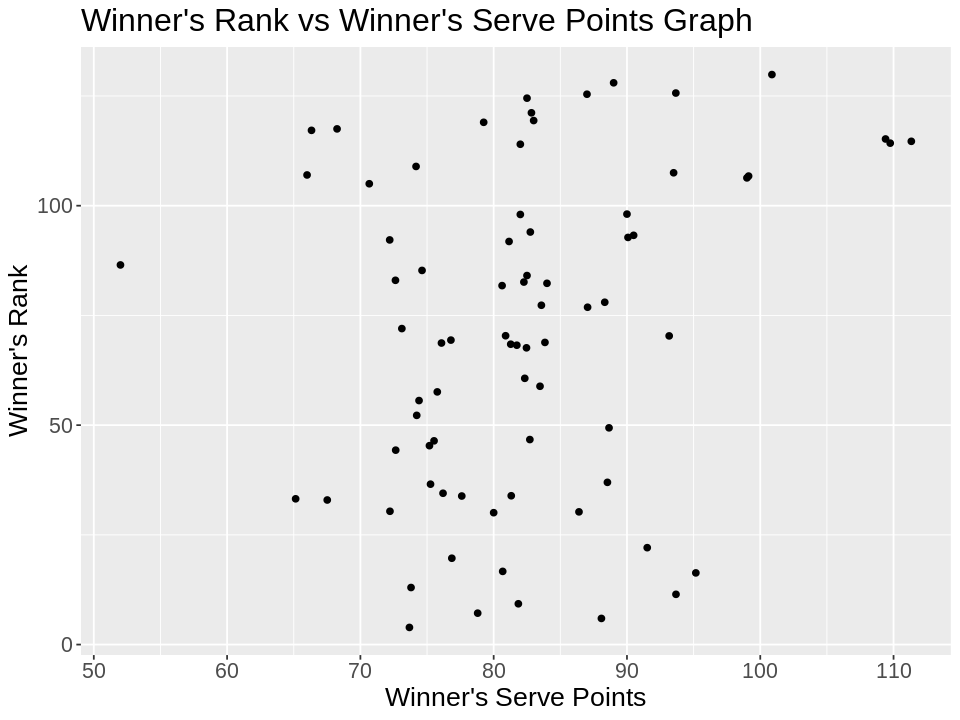

In [19]:
rank_vs_svpt <- player_training %>% 
    ggplot(aes(x = w_svpt, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Serve Points", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Serve Points Graph") +
        theme(text = element_text(size = 16))

rank_vs_svpt
cat("Figure 4: Scatter plot of winner's rank versus winner's serve points")

#### Winner's Rank vs Winner's First Serves Made

We can see there is a weak positive relationship between the response variable `winner_rank` and the `w_1stIn` predictor, based on the spread out points and fairly uphill pattern as you move from left to right.

Figure 5: Scatter plot of winner's rank versus winner's first-serves made

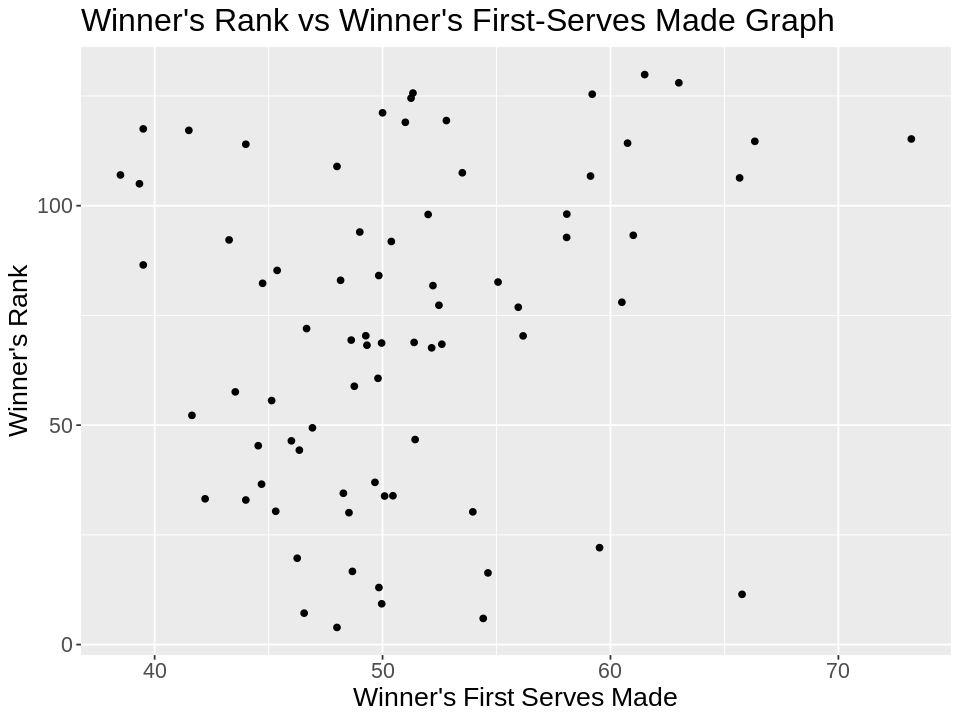

In [20]:
rank_vs_1stIn <- player_training %>% 
    ggplot(aes(x = w_1stIn, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's First Serves Made", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's First-Serves Made Graph") +
        theme(text = element_text(size = 16))

rank_vs_1stIn
cat("Figure 5: Scatter plot of winner's rank versus winner's first-serves made")

#### Winner's Rank vs Winner's First-Serve Points Won

We can see there is almost zero relationship between the response variable `winner_rank` and the `w_1stWon` predictor, based on the spread out points.

Figure 6: Scatter plot of winner's rank versus winner's first-serve points won

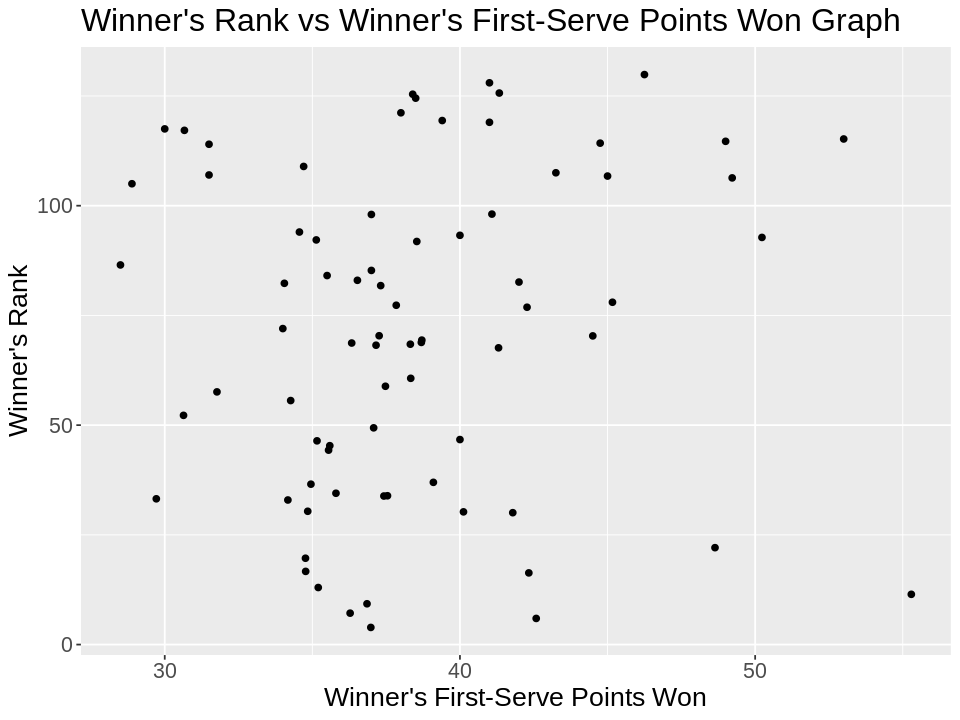

In [22]:
rank_vs_1stWon <- player_training %>% 
    ggplot(aes(x = w_1stWon, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's First-Serve Points Won", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's First-Serve Points Won Graph") +
        theme(text = element_text(size = 16))

rank_vs_1stWon
cat("Figure 6: Scatter plot of winner's rank versus winner's first-serve points won")

#### Winner's Rank vs Winner's Second-Serve Points Won

We can see there is a weak positive relationship between the response variable `winner_rank` and the `w_2ndWon` predictor, based on the spread out points and fairly uphill pattern as you move from left to right.

Figure 7: Scatter plot of winner's rank versus winner's second-serve points won

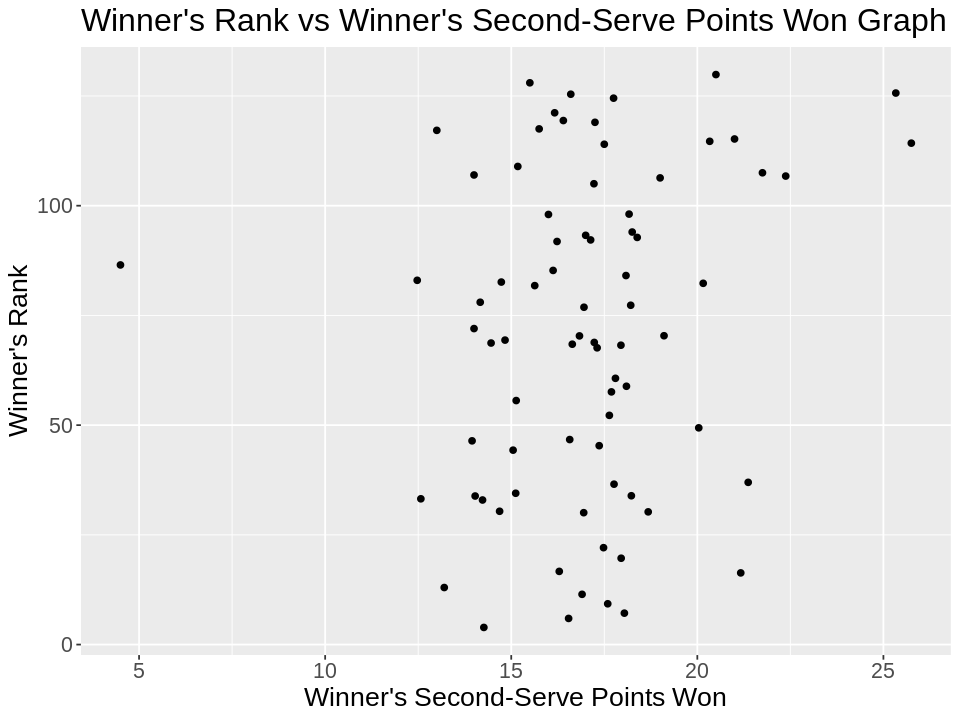

In [24]:
rank_vs_2ndWon <- player_training %>% 
    ggplot(aes(x = w_2ndWon, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Second-Serve Points Won", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Second-Serve Points Won Graph") +
        theme(text = element_text(size = 16))

rank_vs_2ndWon
cat("Figure 7: Scatter plot of winner's rank versus winner's second-serve points won")

#### Winner's Rank vs Winner's Serve Games

We can see there is a weak positive relationship between the response variable `winner_rank` and the `w_SvGms` predictor, based on the spread out points and fairly uphill pattern as you move from left to right.

Figure 8: Scatter plot of winner's rank versus winner's serve games

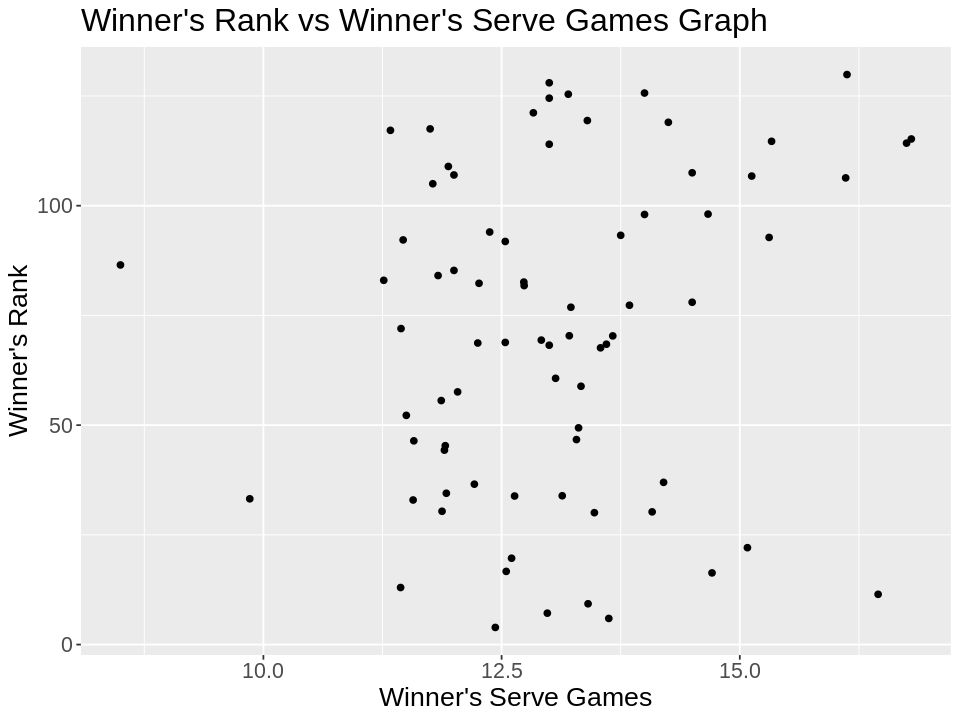

In [25]:
rank_vs_svgm <- player_training %>% 
    ggplot(aes(x = w_SvGms, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Serve Games", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Serve Games Graph") +
        theme(text = element_text(size = 16))

rank_vs_svgm
cat("Figure 8: Scatter plot of winner's rank versus winner's serve games")

#### Winner's Rank vs Winner's Break Points Saved

We can see there is a weak positive relationship between the response variable `winner_rank` and the `w_bpSaved` predictor, based on the spread out points and fairly uphill pattern as you move from left to right.

Figure 9: Scatter plot of winner's rank versus winner's break points saved

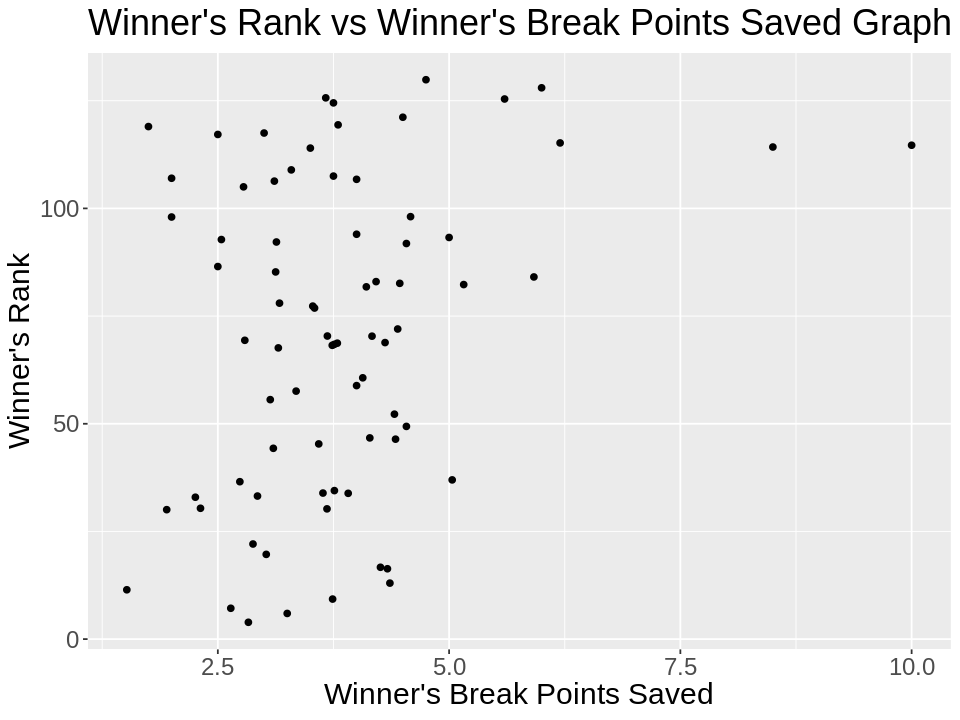

In [26]:
rank_vs_bps <- player_training %>% 
    ggplot(aes(x = w_bpSaved, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Break Points Saved", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Break Points Saved Graph") +
        theme(text = element_text(size = 18))

rank_vs_bps
cat("Figure 9: Scatter plot of winner's rank versus winner's break points saved")

#### Winner's Rank vs Winner's Break Points Faced

We can see there is a weak positive relationship between the response variable `winner_rank` and the `w_bpFaced` predictor, based on the spread out points and fairly uphill pattern as you move from left to right.

Figure 10: Scatter plot of winner's rank versus winner's break points faced

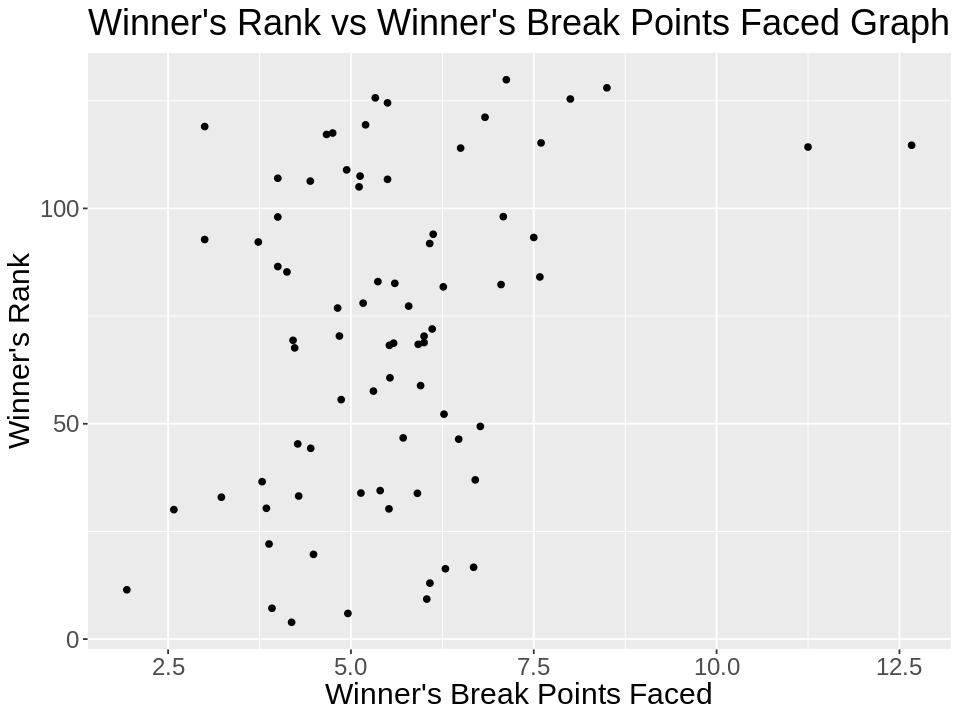

In [27]:
rank_vs_bpf <- player_training %>% 
    ggplot(aes(x = w_bpFaced, y = winner_rank)) +
        geom_point() +
        labs(x = "Winner's Break Points Faced", y = "Winner's Rank", 
             title = "Winner's Rank vs Winner's Break Points Faced Graph") +
        theme(text = element_text(size = 18))

rank_vs_bpf
cat("Figure 10: Scatter plot of winner's rank versus winner's break points faced")

### **Data Analysis  —  K-Nearest Neighbor Regression**

#### **Create a Recipe**

First, we will create a recipe for preprocessing our data. All data preprocessing in the `tidymodels` framework is done using a recipe. Here, we'll create a recipe for the `player_training` data, using the `winner_rank` variable as the objective and the all other variables as predictors. Standardization data is very crucial in k-nearest neighbors algorithm. K-nearest neighbor is a distance-based algorithm that determines new observations based on similarity measurements (e.g., distance metrics) with nearby observations in the training set. The scale of the variables affects all such distance-based methods. Standardization equalizes the contributions of all factors to the distance measures.

In [29]:
player_recipe <- recipe(winner_rank ~ ., data = player_training) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors())

player_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         11

Operations:

Scaling for all_predictors()
Centering for all_predictors()

#### **Tuning the Regression Model**

Next, we create a model specification for K-nearest neighbors regression. We use `set_mode("regression")` now in the model specification to denote a regression problem and `neighbors = tune()` to tune the number of neighbors in the model. The `tune()` function acts as a placeholder function for argument values that are to be tuned, which in this case is the number of k that is most optimal for the `player_taining` dataset.

In [30]:
set.seed(1)
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("regression")

player_spec

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### **5-Fold Cross Validation**

Cross-validation is a process of splitting the `player_training` into N folds. In practice, we may use any number of folds, and the more we use, the more accurate our estimate will be (lower standard error). However, computational power limits us: the more folds we select, the more computation it requires, and hence the longer it takes to run the analysis. When performing cross-validation, we must take into account the size of the data, the algorithm's speed, and the performance of the machine. In fact, this is a trial and error procedure, but the most common N-folds are 5 or 10. 

We chose N = 5 because the size of our 'player training' dataset is fairly tiny and faster performance. Then it will iteratively use one block of the data as the validation set (for evaluation), and the rest will be the training set. Cross-validation is used to verify that our regression model is accurate enough to be evaluated regardless of the training and validation data sets. Using many train/validation splits allows us to gain a better approximation of accuracy.

In [104]:
set.seed(1)
player_vfold <- vfold_cv(player_training, v = 5, strata = winner_rank)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


#### **Creating a Workflow**

In [105]:
player_wkflw <- workflow() %>% 
    add_recipe(player_recipe) %>% 
    add_model(player_spec)

player_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### **Run Cross Validation**

In [109]:
set.seed(1)
gridvals <- tibble(neighbors = seq(from = 1, to = 40))

player_results <- player_wkflw %>% 
    tune_grid(resamples = player_vfold, grid = gridvals) %>% 
    collect_metrics() %>% 
    filter(.metric == "rmse")

# Show the results
cat("Table 6: Result of 5-fold cross validation on the tennis training dataset")
player_results

Table 6: Result of 5-fold cross validation on the tennis training dataset

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,32.01502,5,1.237614,Model01
2,rmse,standard,28.57208,5,1.075183,Model02
3,rmse,standard,29.12014,5,1.153577,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
38,rmse,standard,31.61626,5,1.276687,Model38
39,rmse,standard,31.91630,5,1.332520,Model39
40,rmse,standard,32.24639,5,1.352985,Model40


#### **Visualize the RMSE**

The RMSE changes with the number of neighbors $K$, as seen in Figure 11. To identify the ideal option for the number of neighbors, we will use the minimal RMSE (lowest error). The smallest RMSE occurs when $K = 8$.

Figure 11: Effect of the number of neighbors on the RMSE

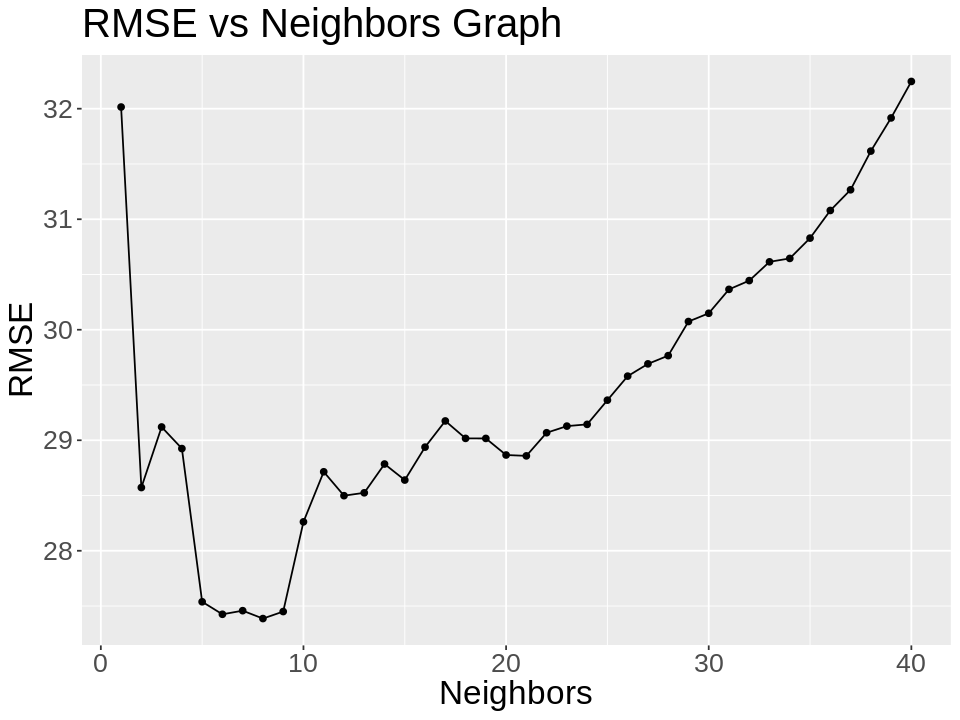

In [107]:
rmspe_plot <- ggplot(player_results, aes(x = neighbors, y = mean)) +
    geom_point() + 
    geom_line() +
    labs(x = "Neighbors", y = "RMSE", title = "RMSE vs Neighbors Graph") +
    theme(text = element_text(size = 20))

rmspe_plot
cat("Figure 11: Effect of the number of neighbors on the RMSE")

#### **Evaluating on testing dataset**

We will evaluate our model's RMSE on our `player_testing` dataset to determine how well our model can predict unknown data. To do so, we will retrain our k-nearest neighbors regression model using $K = 8$ neighbors on the entire `player_training` dataset. Then we will use `predict()` to make predictions on the test data and use the `metrics()` function again to compute the summary of regression quality.

In [108]:
kmin <- player_results %>% 
    filter(mean == min(mean)) %>% 
    pull(neighbors)

min_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) %>% 
    set_engine("kknn") %>% 
    set_mode("regression")

min_fit <- workflow() %>% 
    add_recipe(player_recipe) %>% 
    add_model(min_spec) %>% 
    fit(data = player_training)

player_preds <- min_fit %>% 
    predict(player_testing) %>% 
    bind_cols(player_testing)

player_summary <- player_preds %>% 
    metrics(truth = winner_rank, estimate = .pred) %>% 
    filter(.metric == 'rmse')

cat("Table 7: Accuracy of the regression model on the testing dataset")
player_summary

Table 7: Accuracy of the regression model on the testing dataset

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,21.81939


Here, we performed k-nearest neighbors regression model on the `player_training` dataset and test the model on the `player_testing` dataset. We set the `winner_rank` variable to be the target variable, and all other variables — `w_ace`, `w_df`, `w_svpt`, `w_1stIn`, `w_1stWon`, `w_2ndWon`, `w_SvGms`, `w_bpSaved`, `w_bpFaced`, `total_played`, `win_percent` — as the predictors. The test error of our final model, as determined by RMSPE, is 21.81939. Note that RMSPE is measured in the same units as the response variable. In other words, we anticipate the inaccuracy in our prediction to be about 21.81939 ranks based on new observations. Figure 12 - Figure 22 visualizes the model’s predictions overlaid on top of the data.

#### **Visualization of the model's prediction**

#### Winner's Rank vs Winner's Aces Prediction

Figure 12 shows the predictions that our final model makes across the range of winner's ace predictor for the winner's world rankings.

Figure 12: Predicted values of winner's rank (blue line) from the winner's ace predictor

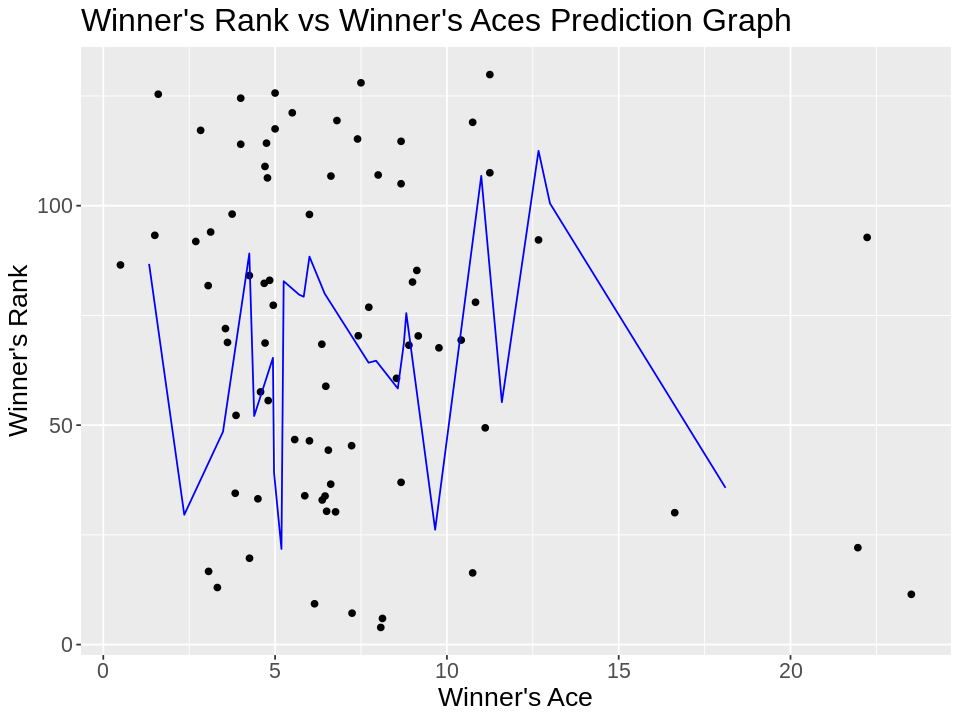

In [58]:
w_ace_pred <- ggplot(player_training, aes(x = w_ace, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = w_ace, y = .pred), 
              color = "blue") +
    labs(x = "Winner's Ace", y = "Winner's Rank", 
         title = "Winner's Rank vs Winner's Aces Prediction Graph") +
    theme(text = element_text(size = 16))

w_ace_pred
cat("Figure 12: Predicted values of winner's rank (blue line) from the winner's ace predictor")

#### Winner's Rank vs Winner's Double Faults Prediction

Figure 13 shows the predictions that our final model makes across the range of winner's double faults predictor for the winner's world rankings.

Figure 13: Predicted values of winner's rank (blue line) from the winner's double faults predictor

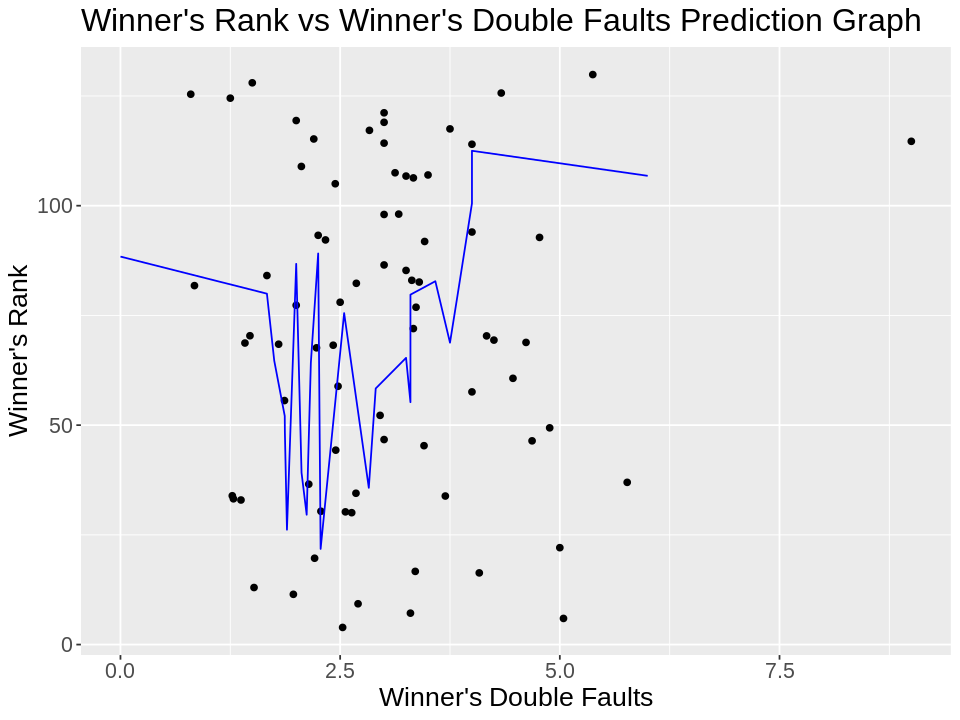

In [68]:
w_df_pred <- ggplot(player_training, aes(x = w_df, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = w_df, y = .pred), 
              color = "blue") +
    labs(x = "Winner's Double Faults", y = "Winner's Rank", 
         title = "Winner's Rank vs Winner's Double Faults Prediction Graph") +
    theme(text = element_text(size = 16))

w_df_pred
cat("Figure 13: Predicted values of winner's rank (blue line) from the winner's double faults predictor")

#### Winner's Rank vs Winner's Serve Points Prediction

Figure 14 shows the predictions that our final model makes across the range of winner's serve points predictor for the winner's world rankings.

Figure 14: Predicted values of winner's rank (blue line) from the winner's serve points predictor

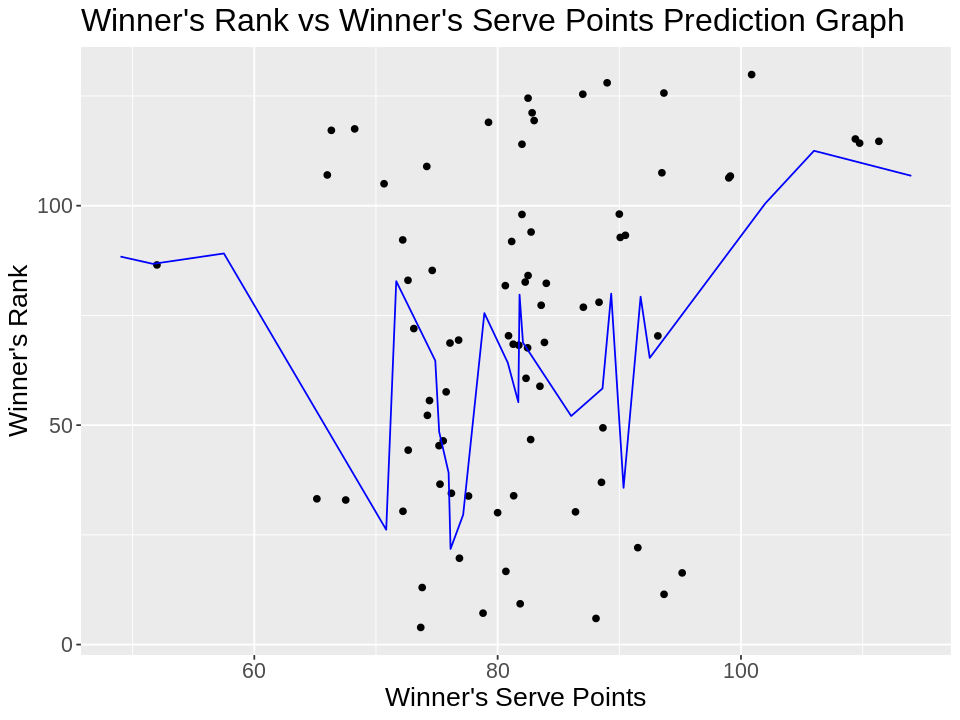

In [90]:
w_svpt_pred <- ggplot(player_training, aes(x = w_svpt, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = w_svpt, y = .pred), 
              color = "blue") +
    labs(x = "Winner's Serve Points", y = "Winner's Rank", 
         title = "Winner's Rank vs Winner's Serve Points Prediction Graph") +
    theme(text = element_text(size = 16))

w_svpt_pred
cat("Figure 14: Predicted values of winner's rank (blue line) from the winner's serve points predictor")

#### Winner's Rank vs Winner's First Serves Made Prediction

Figure 15 shows the predictions that our final model makes across the range of winner's first serves made predictor for the winner's world rankings.

Figure 15: Predicted values of winner's rank (blue line) from the winner's first serves made predictor

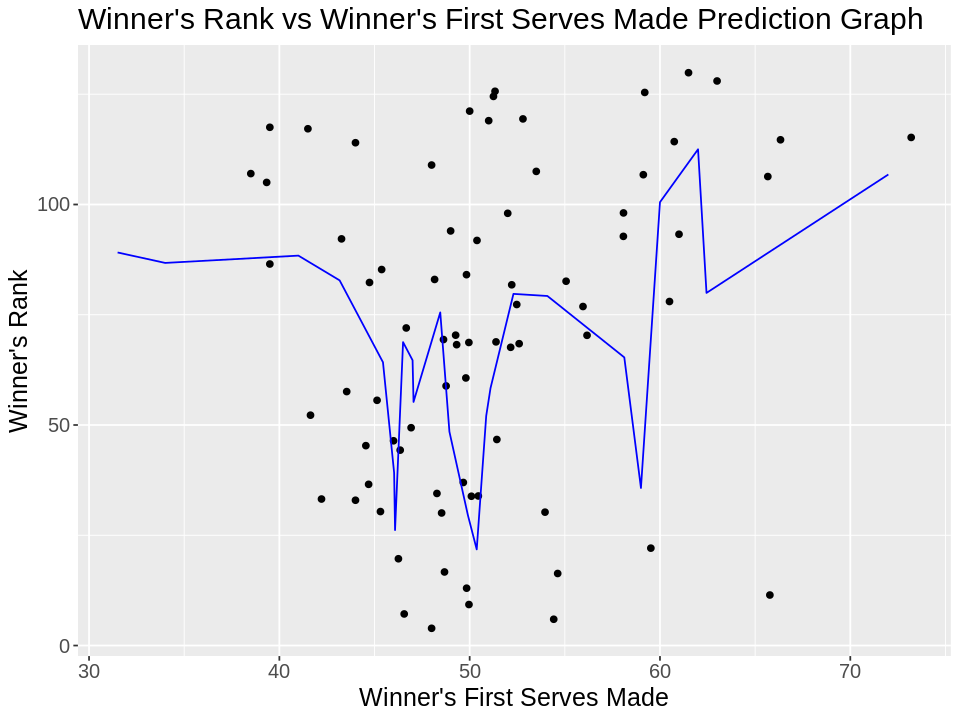

In [91]:
w_1stIn_pred <- ggplot(player_training, aes(x = w_1stIn, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = w_1stIn, y = .pred), 
              color = "blue") +
    labs(x = "Winner's First Serves Made", y = "Winner's Rank", 
         title = "Winner's Rank vs Winner's First Serves Made Prediction Graph") +
    theme(text = element_text(size = 15))

w_1stIn_pred
cat("Figure 15: Predicted values of winner's rank (blue line) from the winner's first serves made predictor")

#### Winner's Rank vs Winner's First-Serve Points Won Prediction

Figure 16 shows the predictions that our final model makes across the range of winner's first-serve points won predictor for the winner's world rankings.

Figure 16: Predicted values of winner's rank (blue line) from the winner's first-serve points won predictor

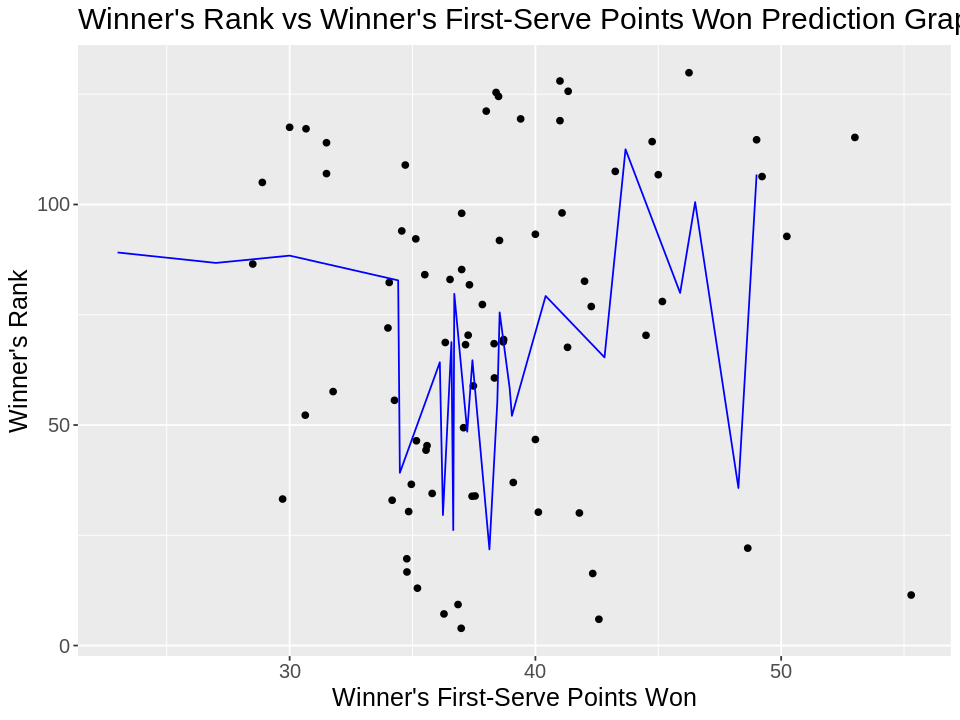

In [92]:
w_1stWon_pred <- ggplot(player_training, aes(x = w_1stWon, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = w_1stWon, y = .pred), 
              color = "blue") +
    labs(x = "Winner's First-Serve Points Won", y = "Winner's Rank", 
         title = "Winner's Rank vs Winner's First-Serve Points Won Prediction Graph") +
    theme(text = element_text(size = 15))

w_1stWon_pred
cat("Figure 16: Predicted values of winner's rank (blue line) from the winner's first-serve points won predictor")

#### Winner's Rank vs Winner's Second-Serve Points Won Prediction

Figure 17 shows the predictions that our final model makes across the range of winner's second-serve points won predictor for the winner's world rankings.

Figure 17: Predicted values of winner's rank (blue line) from the winner's second-serve points won predictor

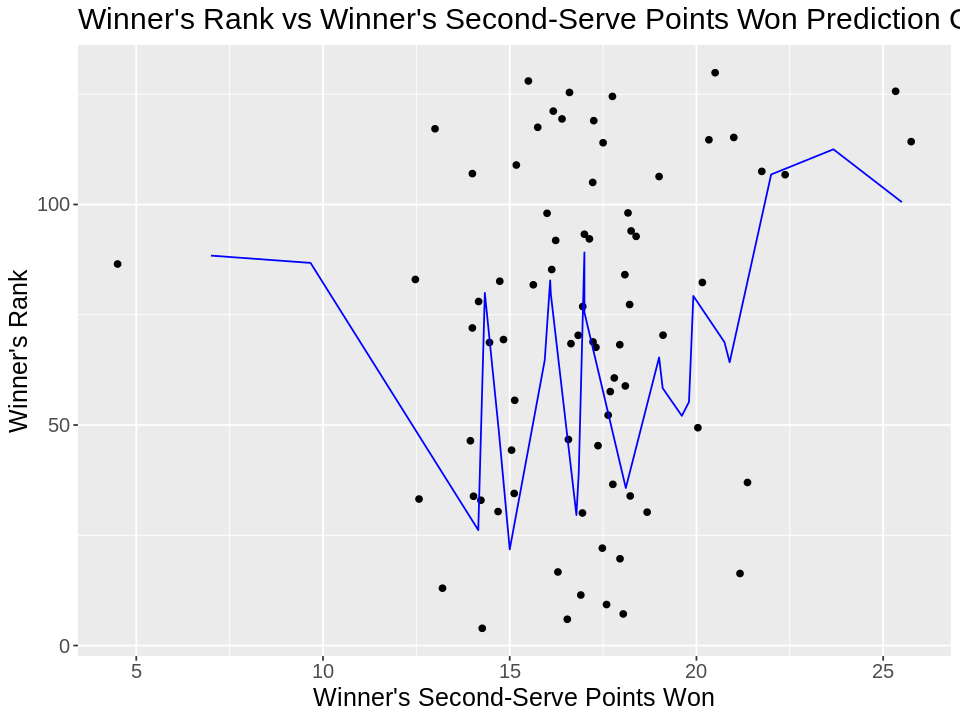

In [93]:
w_2ndWon_pred <- ggplot(player_training, aes(x = w_2ndWon, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = w_2ndWon, y = .pred), 
              color = "blue") +
    labs(x = "Winner's Second-Serve Points Won", y = "Winner's Rank", 
         title = "Winner's Rank vs Winner's Second-Serve Points Won Prediction Graph") +
    theme(text = element_text(size = 15))

w_2ndWon_pred
cat("Figure 17: Predicted values of winner's rank (blue line) from the winner's second-serve points won predictor")

#### Winner's Rank vs Winner's Serve Games Prediction

Figure 18 shows the predictions that our final model makes across the range of winner's serve games predictor for the winner's world rankings.

Figure 18: Predicted values of winner's rank (blue line) from the winner's serve games predictor

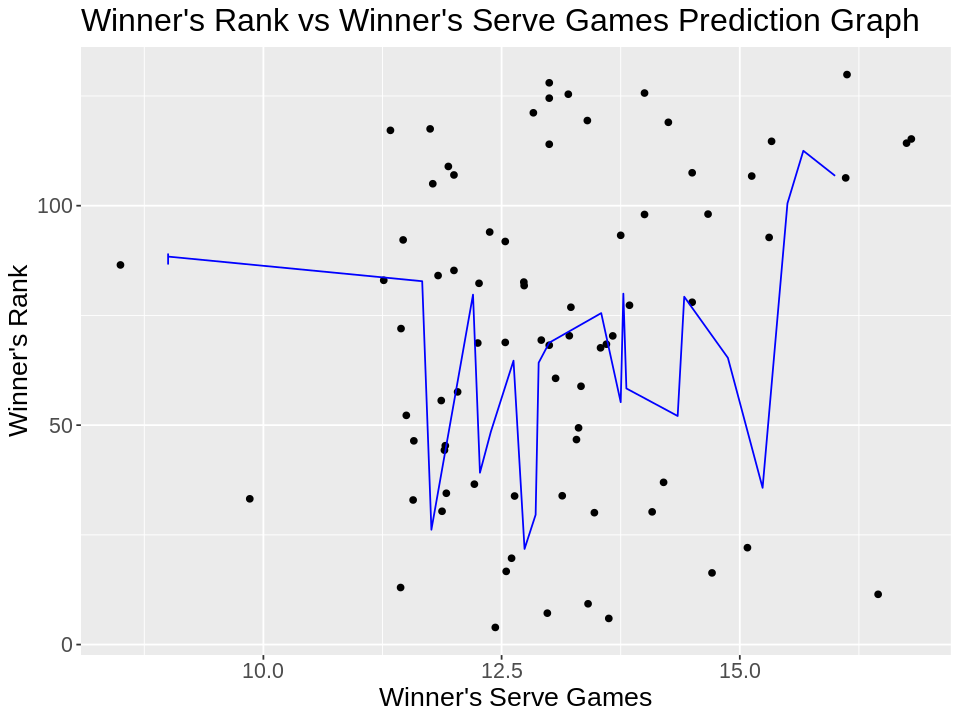

In [94]:
w_SvGms_pred <- ggplot(player_training, aes(x = w_SvGms, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = w_SvGms, y = .pred), 
              color = "blue") +
    labs(x = "Winner's Serve Games", y = "Winner's Rank", 
         title = "Winner's Rank vs Winner's Serve Games Prediction Graph") +
    theme(text = element_text(size = 16))

w_SvGms_pred
cat("Figure 18: Predicted values of winner's rank (blue line) from the winner's serve games predictor")

#### Winner's Rank vs Winner's Break Points Saved Prediction

Figure 19 shows the predictions that our final model makes across the range of winner's break points saved predictor for the winner's world rankings.

Figure 19: Predicted values of winner's rank (blue line) from the winner's break points saved predictor

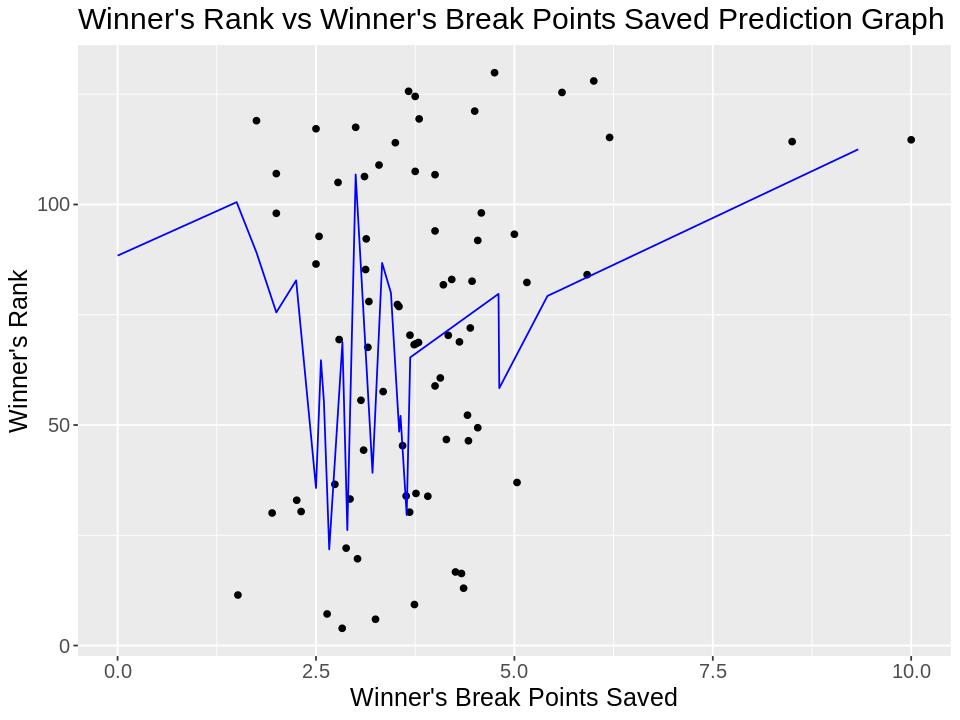

In [95]:
w_bpSaved_pred <- ggplot(player_training, aes(x = w_bpSaved, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = w_bpSaved, y = .pred), 
              color = "blue") +
    labs(x = "Winner's Break Points Saved", y = "Winner's Rank", 
         title = "Winner's Rank vs Winner's Break Points Saved Prediction Graph") +
    theme(text = element_text(size = 15))

w_bpSaved_pred
cat("Figure 19: Predicted values of winner's rank (blue line) from the winner's break points saved predictor")

#### Winner's Rank vs Winner's Break Points Faced Prediction

Figure 20 shows the predictions that our final model makes across the range of winner's break points faced predictor for the winner's world rankings.

Figure 20: Predicted values of winner's rank (blue line) from the winner's break points faced predictor

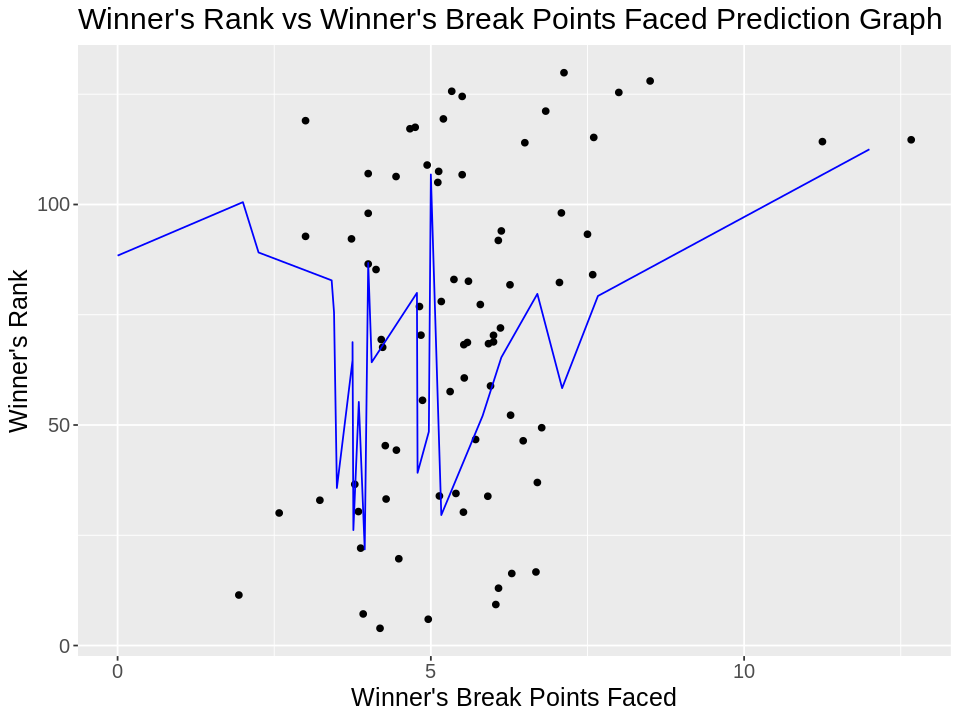

In [96]:
w_bpFaced_pred <- ggplot(player_training, aes(x = w_bpFaced, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = w_bpFaced, y = .pred), 
              color = "blue") +
    labs(x = "Winner's Break Points Faced", y = "Winner's Rank", 
         title = "Winner's Rank vs Winner's Break Points Faced Prediction Graph") +
    theme(text = element_text(size = 15))

w_bpFaced_pred
cat("Figure 20: Predicted values of winner's rank (blue line) from the winner's break points faced predictor")

#### Winner's Rank vs Player's Total Games Played Prediction

Figure 21 shows the predictions that our final model makes across the range of winner's total games played predictor for the winner's world rankings.

Figure 21: Predicted values of winner's rank (blue line) from the player's total games played predictor

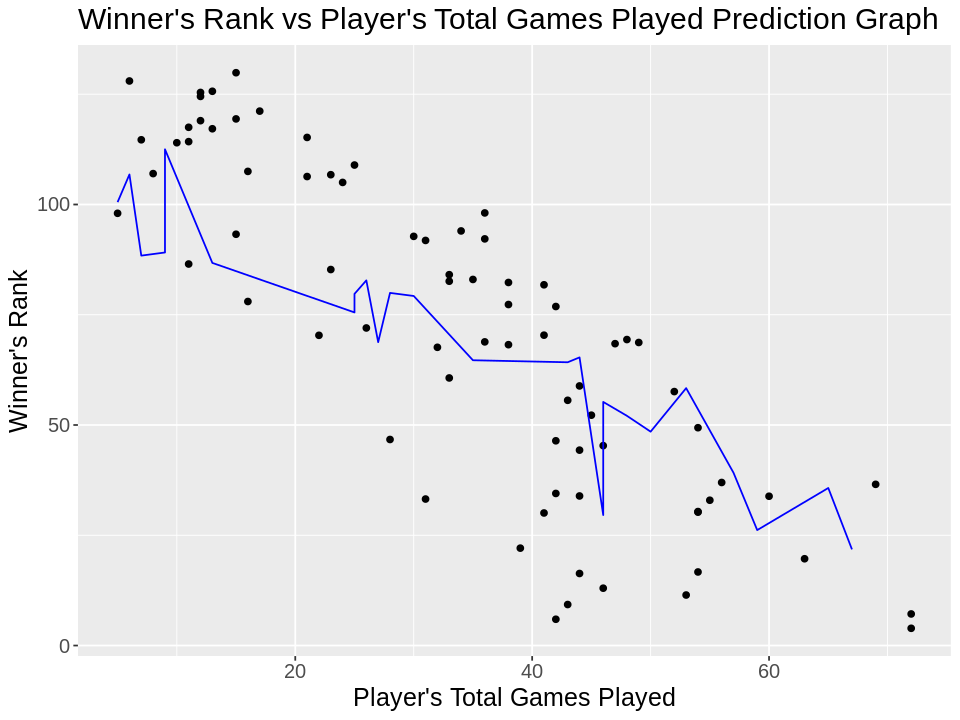

In [97]:
w_played_pred <- ggplot(player_training, aes(x = total_played, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = total_played, y = .pred), 
              color = "blue") +
    labs(x = "Player's Total Games Played", y = "Winner's Rank", 
         title = "Winner's Rank vs Player's Total Games Played Prediction Graph") +
    theme(text = element_text(size = 15))

w_played_pred
cat("Figure 21: Predicted values of winner's rank (blue line) from the player's total games played predictor")

#### Winner's Rank vs Player's Win Percentage Prediction

Figure 22 shows the predictions that our final model makes across the range of winner's win percentage predictor for the winner's world rankings.

Figure 22: Predicted values of winner's rank (blue line) from the player's win percentage predictor

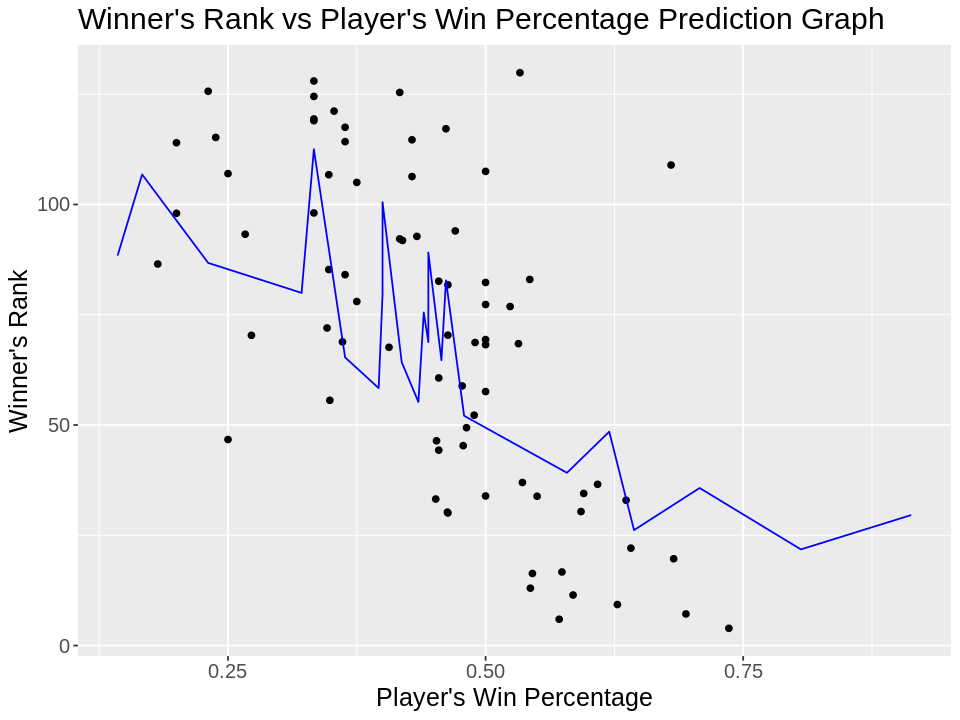

In [98]:
w_percent_pred <- ggplot(player_training, aes(x = win_percent, y = winner_rank)) +
    geom_point() +
    geom_line(data = player_preds, 
              mapping = aes(x = win_percent, y = .pred), 
              color = "blue") +
    labs(x = "Player's Win Percentage", y = "Winner's Rank", 
         title = "Winner's Rank vs Player's Win Percentage Prediction Graph") +
    theme(text = element_text(size = 15))

w_percent_pred
cat("Figure 22: Predicted values of winner's rank (blue line) from the player's win percentage predictor")

<br>

# **Discussion**

Overall the results of our data predicted the ranking of the players in which the margin of the prediction is fairly high. According to the KNN regression, the world rankings of the top 100 tennis players based on their game statistics can vary by approximately 21 ranks, which is a fairly weak predictor. It means that the averages of the nearest neighbors computed by the regression included the 8 nearest neighbors. Although this is not the strongest predictor for rank, upon further research into tennis rankings, a large gap can be expected. The biggest limitation we faced was the sample size as increasing the sample size was ruining the predictor estimate as the number of matches played by the players at the bottom are less than compared to players at the top. And a new player in the ranking will face the players at the bottom of the rankings who has a greater chance to win as compared to the players facing each other with high rankings, this factor causes the predictor estimator to be weak. This is demonstrated particularly in the 2018 ATP World Tour by young rising tennis star Stefano Tsitsipas, who quickly ascended the rankings during that year, shooting from a ranking of 91st in the world to an impressive 15th place (CoreTennis, 2018). These discrepancies in ranking may cause difficulties for the model to accurately predict the rankings of players, especially those who have recently joined the tour. 

These findings can be particularly interesting for aspiring professional tennis players to discover which of their playing statistics should have a focus on. For example, if a top-ranked player has a strong ace, saved breakpoint, or first-serve point won, players can focus on these specific aspects of their game. This predictor can also be used to track the future career path of a player. Although not to boast any real-world significance, sports fans and data junkies are welcome to read and expand upon our findings.

As for the future of tennis statistics and rankings, there remain many different factors that could affect a player’s ranking. For example, which statistic of a player’s game has the most effect on his or her ranking? Since this ranking was mostly focused on the top 100 players, what would the prediction of the rankings for junior or lower levels of tennis yield? These are all questions that can be asked in terms of tennis rankings, however, the analysis that was done in this report is a solid foundation for future predictions. 

<br>

# **References**

Anne-Timbers, T., Campbell, T., & Lee, M. (2021). _Data Science: A First Introduction_. Ubc-Dsci.github.io. https://ubc-dsci.github.io/introduction-to-datascience/index.html.

Association of Tennis Professionals. (2019). _Official Site of Men’s Professional Tennis | ATP Tour | Tennis_. ATP Tour. https://www.atptour.com/

CoreTennis. (2018). _Ranking history of Stefanos Tsitsipas_. CoreTennis.net. https://www.coretennis.net/tennis-player/stefanos-tsitsipas/54685/ranking.html

Sackman, J. (2018). _Statistics From the Top 500 Players Around the World: ATP Matches 2018_. In GitHub.com. https://github.com/JeffSackmann/tennis_atp/blob/master/atp_matches_2018.csv

Simonsson, F. (2021). _TennisPredict - Ultimate Resource To Learn About Tennis_. TennisPredict.com; Amazon Services LLC Associates Program. https://tennispredict.com/